<p align="center">
    <img src="https://user-images.githubusercontent.com/46355364/220746807-669cdbc1-ac67-404c-b0bb-4a3d67d9931f.jpg" alt="Logo">
</center>

[![GitHub Sponsors](https://img.shields.io/badge/Sponsor_this_Project-grey?logo=github)](https://github.com/sponsors/JerBouma)
[![Documentation](https://img.shields.io/badge/Documentation-grey?logo=readme)](https://www.jeroenbouma.com/projects/financedatabase)
[![Supported Python Versions](https://img.shields.io/pypi/pyversions/financedatabase)](https://pypi.org/project/financedatabase/)
[![PYPI Version](https://img.shields.io/pypi/v/financedatabase)](https://pypi.org/project/financedatabase/)
[![PYPI Downloads](https://static.pepy.tech/badge/financedatabase/month)](https://pepy.tech/project/financedatabase)

The **FinanceDatabase** serves the role of providing anyone with any type of financial product categorisation entirely for free. To be able to achieve this, the FinanceDatabase relies on involvement from the community to add, edit and remove tickers over time. This is made easy enough that anyone, even with a lack of coding experience can contribute because of the usage of CSV files that can be manually edited. I'd like to invite you to go to the **[Contributing Guidelines](https://github.com/JerBouma/FinanceDatabase/blob/main/CONTRIBUTING.md)** to understand how you can help. Thank you!

As a private investor, the sheer amount of information that can be found on the internet is rather daunting. Trying to 
understand what type of companies or ETFs are available is incredibly challenging with there being millions of
companies and derivatives available on the market. Sure, the most traded companies and ETFs can quickly be found
simply because they are known to the public (for example, Microsoft, Tesla, S&P500 ETF or an All-World ETF). However, 
what else is out there is often unknown.

**This database tries to solve that**. It features 300.000+ symbols containing Equities, ETFs, Funds, Indices, 
Currencies, Cryptocurrencies and Money Markets. It therefore allows you to obtain a broad overview of sectors,
industries, types of investments and much more.

The aim of this database is explicitly _not_ to provide up-to-date fundamentals or stock data as those can be obtained 
with ease (with the help of this database) by using the [FinanceToolkit](https://github.com/JerBouma/FinanceToolkit). Instead, it gives insights into the products 
that exist in each country, industry and sector and gives the most essential information about each product. With 
this information, you can analyse specific areas of the financial world and/or find a product that is hard to find.


# Installation
To install the FinanceDatabase it simply requires the following:

```
pip install financedatabase -U
```

Then within Python use:

```python
import financedatabase as fd
```

In [3]:
import financedatabase as fd

Let's start off by obtaining the Equities dataset from the Finance Database.

In [4]:
equities = fd.Equities()

I want to see how many public companies exist in each sector in the Netherlands. Here, I can obtain all stocks that are located in the Netherlands with `country='Netherlands'`. I also include all exchanges by setting `exclude_exchanges=False`. This will give me all stocks that are listed on all exchanges. This is relevant because some stocks are listed on exchanges that are not the American exchanges which the parameter defaults to.

In [5]:
US_companies = equities.select(country='United States', exclude_exchanges=False)

US_companies

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
000004.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
000573.SZ,one,one does not have significant operations. It i...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.a-star.co,Small Cap,NaN,NaN,NaN,NaN,NaN
000601.SZ,one,one does not have significant operations. It i...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.a-star.co,Small Cap,NaN,NaN,NaN,NaN,NaN
000665.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
000851.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYT.SG,Nevada Copper Corp.,Nevada Copper Corp. engages in the exploration...,EUR,Materials,Materials,Metals & Mining,STU,Stuttgart Stock Exchange,United States,NV,Reno,89501,http://www.nevadacopper.com,Small Cap,NaN,NaN,NaN,NaN,NaN
ZYXI,"Zynex, Inc.","Zynex, Inc., through its subsidiaries, designs...",USD,Health Care,Health Care Equipment & Services,Health Care Technology,NCM,NASDAQ Capital Market,United States,CO,Englewood,80112,http://www.zynex.com,Micro Cap,NaN,NaN,NaN,NaN,NaN
ZZA.DE,"Cinemark Holdings, Inc.","Cinemark Holdings, Inc., together with its sub...",EUR,Communication Services,Media & Entertainment,Entertainment,GER,XETRA,United States,TX,Plano,75093,http://ir.cinemark.com,Mid Cap,NaN,NaN,NaN,NaN,NaN


As you can see this returns the same company multiple times. That makes sense, since a company can be listed on multiple exchanges. Filtering is applied by grouping by unique names and the sector.

In [7]:
unique_US_companies_per_sector = US_companies.groupby('sector').agg({'name': 'nunique'})

unique_US_companies_per_sector

,name
sector,
Communication Services,450
Consumer Discretionary,721
Consumer Staples,401
Energy,464
Financials,2934
Health Care,1779
Industrials,1044
Information Technology,1199
Materials,430


Now with this result, I can plot a pie chart to showcase the distribution of companies in each sector.

<Axes: title={'center': 'Number of companies per sector in the United States'}>

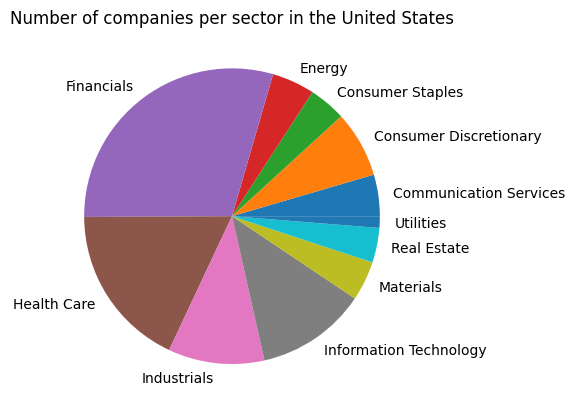

In [14]:
unique_US_companies_per_sector['name'].plot.pie(
    title='Number of companies per sector in the United States',
    ylabel='',
)

If I want to delve deeper into individual companies in a specific sector and country I can do so by filtering on the `sector` and `country` columns. For example, I can filter on the `sector` column to obtain all companies in the `Financials` sector. I can then filter on the `country` column to obtain all companies in the `Financials` sector that are located in the `United States`.

In [12]:
unique_US_companies_per_exchange = US_companies.groupby('sector').agg({'exchange': 'nunique'})

unique_US_companies_per_exchange

,exchange
sector,
Communication Services,31
Consumer Discretionary,44
Consumer Staples,28
Energy,28
Financials,70
Health Care,36
Industrials,33
Information Technology,41
Materials,26


<Axes: title={'center': 'Number of companies per exchange in the United States'}>

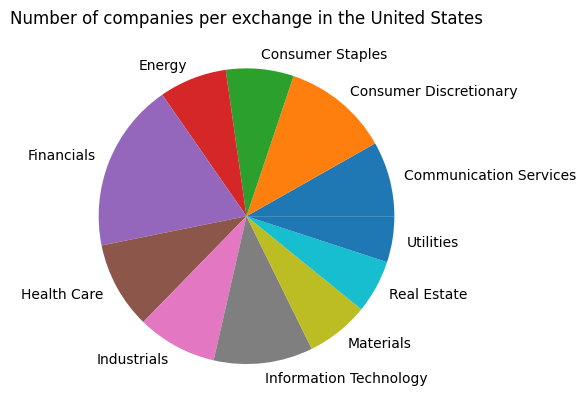

In [15]:
unique_US_companies_per_exchange['exchange'].plot.pie(
    title='Number of companies per exchange in the United States',
    ylabel='',
)

In [9]:
equities.select(country='United States', sector='Financials', exclude_exchanges=False)

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
000004.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
000573.SZ,one,one does not have significant operations. It i...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.a-star.co,Small Cap,NaN,NaN,NaN,NaN,NaN
000601.SZ,one,one does not have significant operations. It i...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.a-star.co,Small Cap,NaN,NaN,NaN,NaN,NaN
000665.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
000851.SZ,two,two is a blank check company. The company was ...,CNY,Financials,Diversified Financials,Diversified Financial Services,SHZ,Shenzhen Stock Exchange,United States,CA,San Francisco,94129,http://www.sz000004.cn,Micro Cap,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWRKW,Z-Work Acquisition Corp.,Z-Work Acquisition Corp. does not have signifi...,USD,Financials,Diversified Financials,Diversified Financial Services,NMS,NASDAQ Global Select,United States,NY,New York,10017,NaN,Micro Cap,NaN,NaN,NaN,NaN,NaN
ZYA.DE,State Street Corporation,"State Street Corporation, through its subsidia...",EUR,Financials,Diversified Financials,Capital Markets,GER,XETRA,United States,MA,Boston,2111,http://www.statestreet.com,Large Cap,NaN,NaN,BBG000DK5XD8,BBG000DK5VM2,BBG001S5RLD5
ZYA.F,State Street Corporation,"State Street Corporation, through its subsidia...",EUR,Financials,Diversified Financials,Capital Markets,FRA,Frankfurt Stock Exchange,United States,MA,Boston,2111,http://www.statestreet.com,Large Cap,NaN,NaN,BBG000DK5W77,BBG000DK5VM2,BBG001S5RLD5


Wanting to know the number of financial comapnies in each state in the United states

In [16]:
unique_US_financial_companies_per_state = US_companies.groupby('state').agg({'name': 'nunique'})

unique_US_financial_companies_per_state

,name
state,
AK,5
AL,34
AR,23
AZ,187
CA,1587
CO,256
CT,140
DC,24
DE,104


In [19]:
unique_US_financial_companies_per_state_sorted = unique_US_financial_companies_per_state.sort_values(by='name', ascending=False)
unique_US_financial_companies_per_state_sorted 

,name
state,
CA,1587
NY,1036
TX,823
FL,689
MA,437
NV,348
IL,337
PA,312
NJ,294
